In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [40]:
df= pd.read_csv('stage2.csv',index_col=0)

In [41]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.861703,4413.062005,60.0,652230.0
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.861703,4413.062005,60.0,652230.0
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.861703,179.426579,60.0,652230.0
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0


In [42]:
df= df.drop(['Land Area(Km2)','Density\\n(P/Km2)'],axis=1)

In [43]:
unique_years = df['Year'].unique()
cols= list(df.columns)
cols.remove('Entity')
cols.remove('Year')
for col in cols:
    total_by_year = df.groupby('Year')[col].sum()
    for year in unique_years:
        df.loc[df['Year'] == year, col] = df[df['Year'] == year][col] / total_by_year[year] * 100

    

    


<AxesSubplot:>

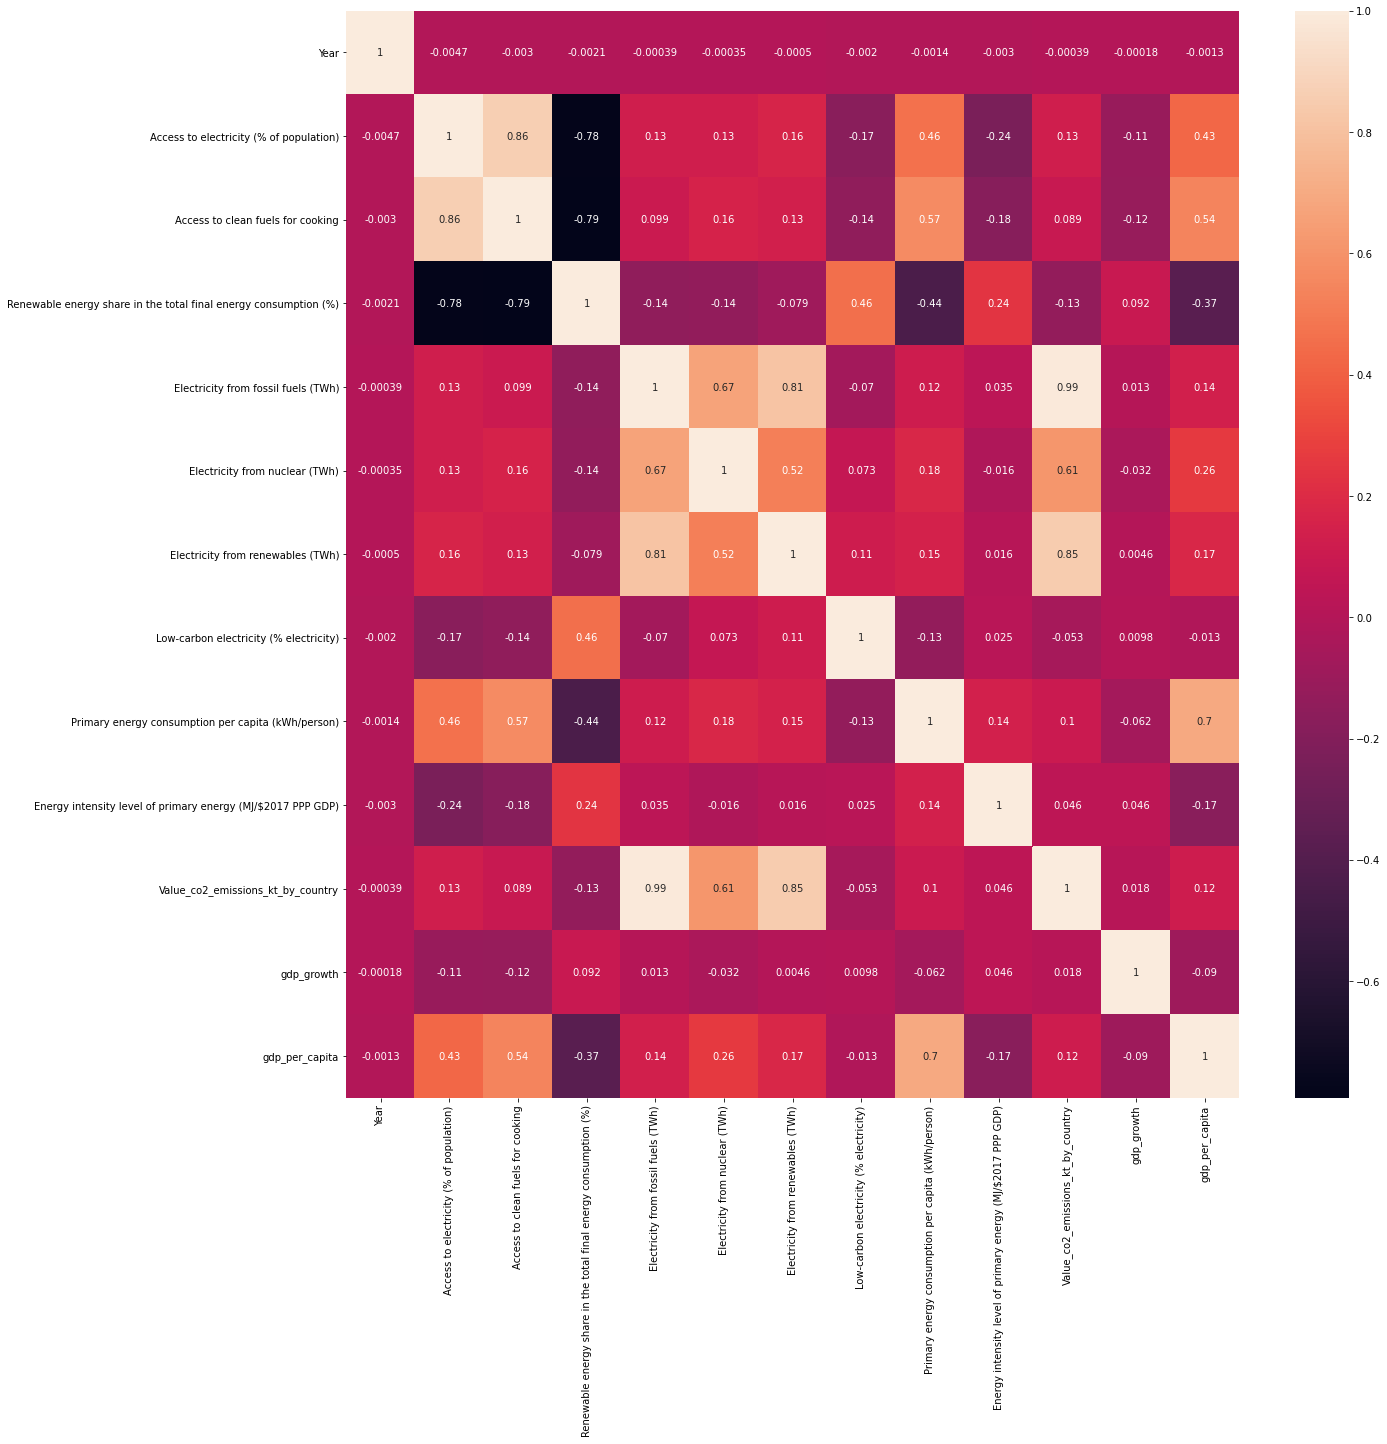

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot= True)

In [45]:
# df.to_csv("GlobalEmission%age.csv")

In [46]:
countries= df.groupby('Entity').mean()['Value_co2_emissions_kt_by_country'].sort_values(ascending=False)

In [47]:
group_A= list(countries[countries>20].index)

In [48]:
group_B= list(list(countries[(countries<10) & (countries>1)].index))

In [49]:
group_C= list(list(countries[countries<1].index))

In [50]:
df_a= df[df['Entity'].isin(group_A)].drop(['Entity','Year'],axis=1)

In [51]:
df_b=df[df['Entity'].isin(group_B)].drop(['Entity','Year'],axis=1)

In [52]:
df_c=df[df['Entity'].isin(group_C)].drop(['Entity','Year'],axis=1)

In [53]:
# Group A countires

<AxesSubplot:>

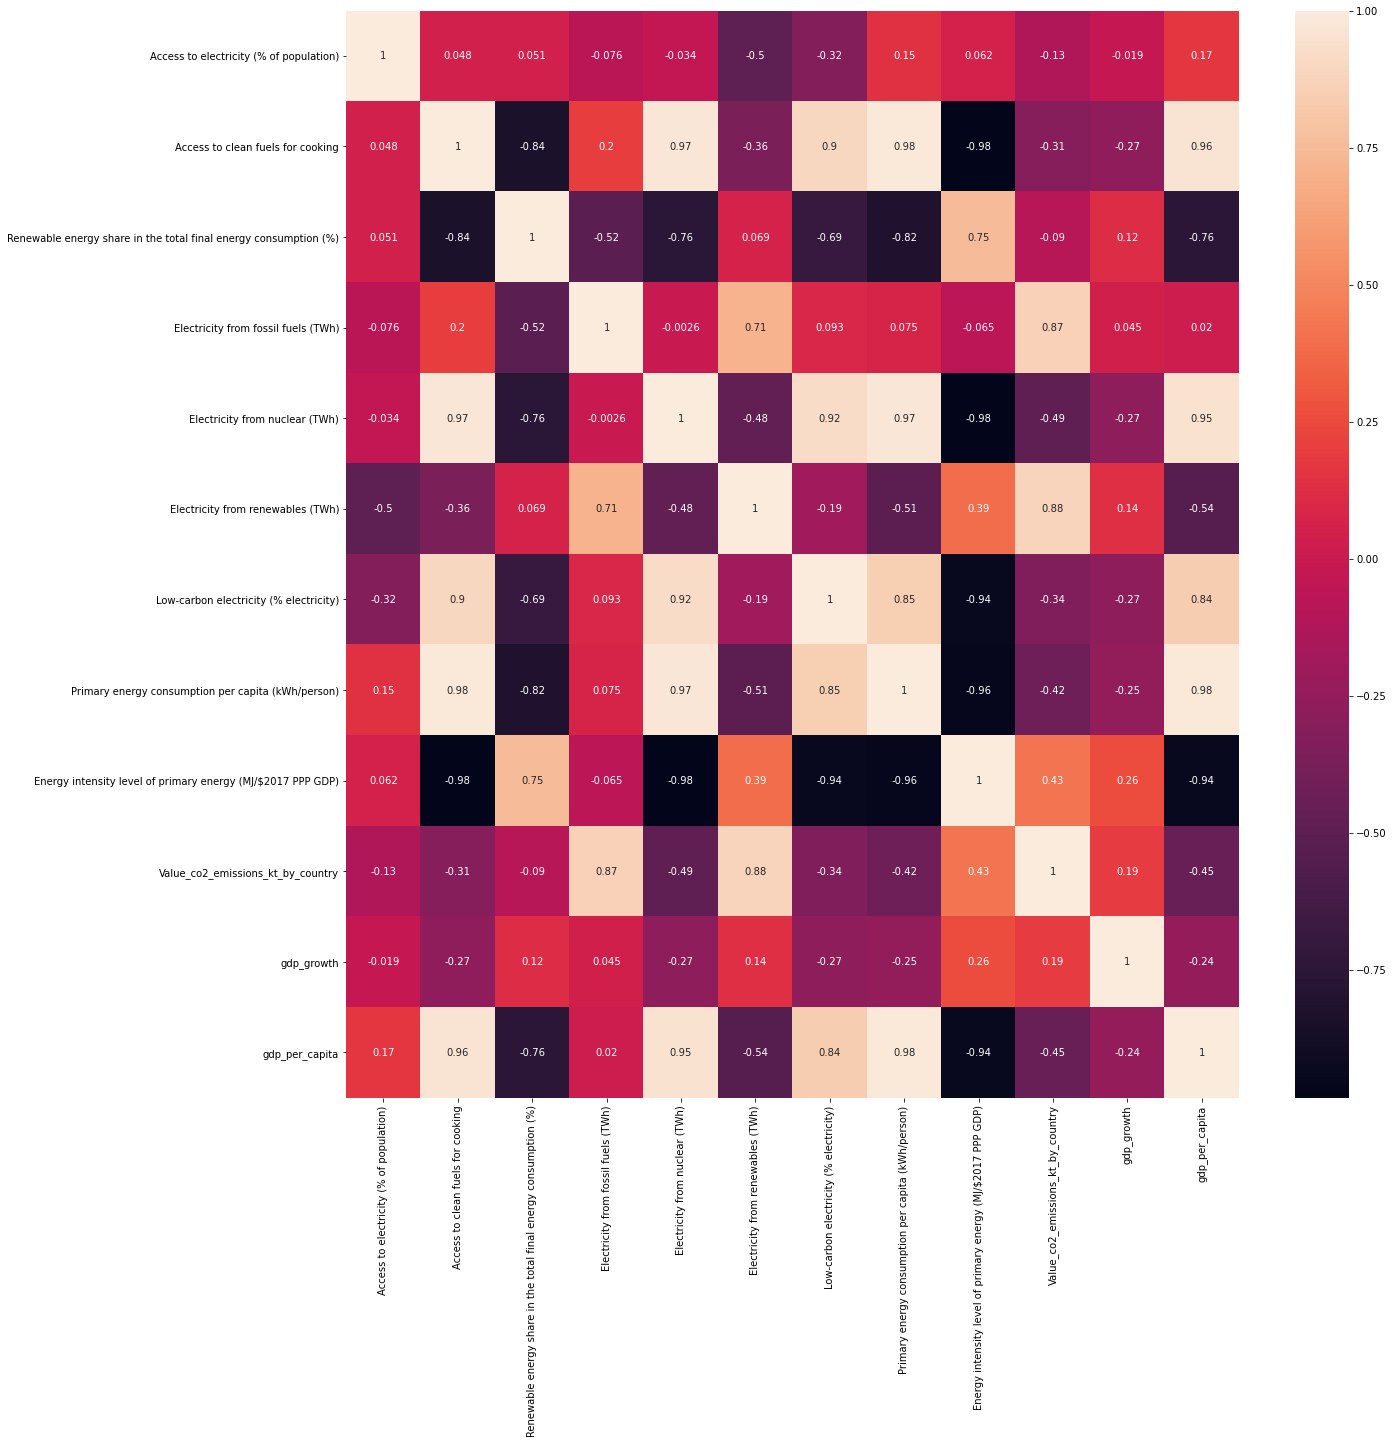

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(df_a.corr(),annot= True)

In [55]:
X= df_a.drop('Value_co2_emissions_kt_by_country',axis= 1)
y= df_a['Value_co2_emissions_kt_by_country']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:

lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, y_train)
predictions = lasso_model.predict(X_test_scaled)

In [59]:

print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 1.4588839406244654
r2 score 0.9388035535387089
mean squared error 2.748706238998764
root mean square error 1.6579222656683166
mean absoute percentage error 0.05606956985226336


In [60]:
check= pd.DataFrame(data= {'col1':y_test,'col2':predictions})

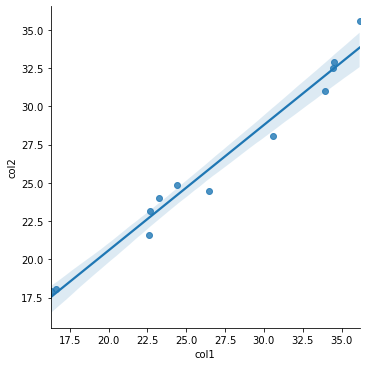

In [61]:
sns.lmplot(x='col1',y='col2',data=check)

In [62]:
coef= pd.DataFrame(data={'Coef':lasso_model.coef_,'Features':X_test.columns})

In [63]:
coef

,Coef,Features
0,0.000000,Access to electricity (% of population)
1,-0.000000,Access to clean fuels for cooking
2,0.000000,Renewable energy share in the total final ener...
3,3.405330,Electricity from fossil fuels (TWh)
4,-0.249258,Electricity from nuclear (TWh)
5,2.009743,Electricity from renewables (TWh)
6,-0.864257,Low-carbon electricity (% electricity)
7,-0.000000,Primary energy consumption per capita (kWh/per...
8,0.000000,Energy intensity level of primary energy (MJ/$...
9,0.000000,gdp_growth


In [64]:
X= df_a.drop(['Value_co2_emissions_kt_by_country','Low-carbon electricity (% electricity)','Electricity from renewables (TWh)'],axis= 1)
y= df_a['Value_co2_emissions_kt_by_country']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:

lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, y_train)
predictions = lasso_model.predict(X_test_scaled)

In [68]:

print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 1.8660104164124505
r2 score 0.90117311267885
mean squared error 4.438919209668468
root mean square error 2.1068742747654565
mean absoute percentage error 0.06555807384987143


In [69]:
check= pd.DataFrame(data= {'col1':y_test,'col2':predictions})

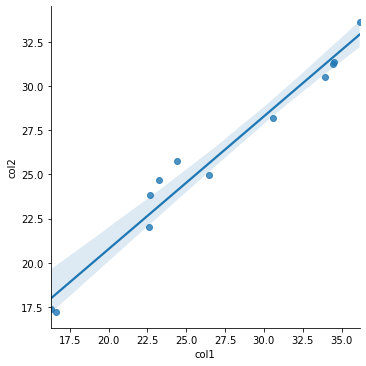

In [70]:
sns.lmplot(x='col1',y='col2',data=check)

In [71]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [72]:
grid_search= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, cv=5,n_jobs=-1,refit=True,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [73]:
predictions= grid_search.predict(X_test)

In [74]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 1.3894033748856647
r2 score 0.9320113276937327
mean squared error 3.0537865931102406
root mean square error 1.7475086818411634
mean absoute percentage error 0.055697746938185334


In [75]:
check= pd.DataFrame(data= {'col1':y_test,'col2':predictions})

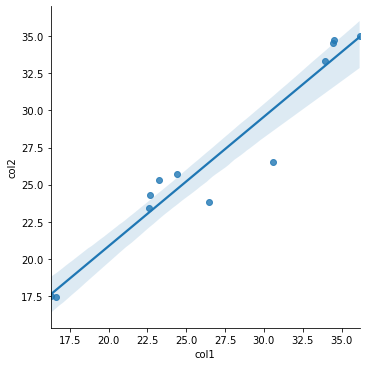

In [76]:
sns.lmplot(x='col1',y='col2',data=check)

In [91]:
df_a['Value_co2_emissions_kt_by_country'].describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.793715,0.762900,0.220920,24.936008,20.196116,16.178858,0.444056,1.231519,0.813032,25.032967,1.707704,1.347718
std,0.034799,0.229047,0.112943,6.077456,15.666743,6.532985,0.093851,0.789119,0.196224,6.741404,7.842673,1.187285
min,0.745252,0.443866,0.083807,13.383970,0.751866,9.030130,0.299445,0.233874,0.607493,16.270063,-12.965738,0.083072
25%,0.761563,0.529087,0.136387,20.120705,3.178552,11.604465,0.346136,0.487449,0.631202,18.275639,0.359959,0.192533
50%,0.792081,0.823809,0.205303,24.956924,24.018256,12.845087,0.485389,1.247219,0.749364,24.560970,0.857844,1.196972
75%,0.823317,0.960721,0.259578,30.202091,34.752039,19.759981,0.509528,1.934774,1.013571,30.823452,1.382160,2.452633
max,0.861163,1.058700,0.523920,35.383493,38.246614,31.590593,0.597917,2.355037,1.123570,36.159663,48.038268,3.262670


3.3771289892074266e-05